# Introduction to Computer Vision and Image Processing

Common Tasks

* 
* 
* 

# Getting Started

## Reading from Images

What we'll learn:

* How to import images to NumPy arrays using OpenCV
* How to plot NumPy arrays (of correct shape) as image
* How to manipulate the colorspace of an image to make sure that it gets rendered correctly
* How to detect a human face in an image

OpenCV is one of the most popular packages in Python for carrying out computer vision related tasks, and that's what we'll be using in the following sections to read-in images and process them.

Note: A lot of things changed between OpenCV2 and OpenCV3 (we'll still be importing cv2 though). Here is a summary of those changes - http://docs.opencv.org/master/db/dfa/tutorial_transition_guide.html. We'll be using Opencv 3.x here.

In [1]:
%matplotlib inline
import cv2
import matplotlib.pyplot as plt
import numpy as np
import sys
from pprint import pprint
print("OpenCV Version : %s " % cv2.__version__)

OpenCV Version : 3.1.0 


### Import an Image

Let's now import an image. It's common for a lot of algorithms implemented in OpenCV to act on a black and white version of the image, so we'll also transform the image to B&W. Here is the image we are going to import:

![](./images/face01.jpg)

In [2]:
# load our image and convert it to grayscale
image = cv2.imread("./images/face01.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

Let's now see what the imported image looks like:

In [3]:
print("\nData Type:"); pprint(type(image))
print("\nExample:\n pixel at (0,0) [B,G,R]:\t[%i,%i,%i]" % tuple(image[0,0,:]))
print("\ndata-type:\n %s " % image.dtype)
print("\nImage shape: "); print("Height:\t\t%i pixels\nWidth:\t\t%i pixels\nChannels:\t%i" % image.shape)
print("\nThe image array:"); pprint(image)


Data Type:
<class 'numpy.ndarray'>

Example:
 pixel at (0,0) [B,G,R]:	[210,208,208]

data-type:
 uint8 

Image shape: 
Height:		250 pixels
Width:		250 pixels
Channels:	3

The image array:
array([[[210, 208, 208],
        [210, 208, 208],
        [210, 208, 208],
        ..., 
        [206, 206, 206],
        [204, 204, 204],
        [204, 204, 204]],

       [[210, 208, 208],
        [210, 208, 208],
        [210, 208, 208],
        ..., 
        [206, 206, 206],
        [204, 204, 204],
        [204, 204, 204]],

       [[210, 208, 208],
        [210, 208, 208],
        [210, 208, 208],
        ..., 
        [206, 206, 206],
        [204, 204, 204],
        [204, 204, 204]],

       ..., 
       [[180, 178, 177],
        [180, 178, 177],
        [180, 178, 177],
        ..., 
        [115, 120, 123],
        [115, 120, 123],
        [115, 120, 123]],

       [[178, 176, 175],
        [178, 176, 175],
        [178, 176, 175],
        ..., 
        [113, 118, 121],
        [113, 118, 1

### Plot an Image

Before we move further, let's make sure that we can again transform this matrix into an image and print it. OpenCV's own function doesn't play very nice with notebooks, so we are going to take an IDE-independent approach by using matplotlib.

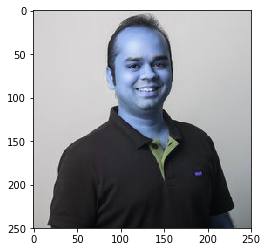

In [4]:
plt.imshow(image)
plt.show()

### Manipulate the colorspace

The colors are off!

* The image has been correctly loaded by openCV as a numpy array, but the color of each pixel has been sorted as BGR.
* Matplotlib's plot expects an RGB image.
* So, for a correct display of the image, it is necessary to swap those channels.

`cvtColor` is the openCV function which changes the color space of an image. It takes as input an image and a numerical flag which represents the conversion function. Let's list some of that.

In [5]:
BGRflags = [flag for flag in dir(cv2) if flag.startswith('COLOR_BGR') ]
pprint(BGRflags)

['COLOR_BGR2BGR555',
 'COLOR_BGR2BGR565',
 'COLOR_BGR2BGRA',
 'COLOR_BGR2GRAY',
 'COLOR_BGR2HLS',
 'COLOR_BGR2HLS_FULL',
 'COLOR_BGR2HSV',
 'COLOR_BGR2HSV_FULL',
 'COLOR_BGR2LAB',
 'COLOR_BGR2LUV',
 'COLOR_BGR2Lab',
 'COLOR_BGR2Luv',
 'COLOR_BGR2RGB',
 'COLOR_BGR2RGBA',
 'COLOR_BGR2XYZ',
 'COLOR_BGR2YCR_CB',
 'COLOR_BGR2YCrCb',
 'COLOR_BGR2YUV',
 'COLOR_BGR2YUV_I420',
 'COLOR_BGR2YUV_IYUV',
 'COLOR_BGR2YUV_YV12',
 'COLOR_BGR5552BGR',
 'COLOR_BGR5552BGRA',
 'COLOR_BGR5552GRAY',
 'COLOR_BGR5552RGB',
 'COLOR_BGR5552RGBA',
 'COLOR_BGR5652BGR',
 'COLOR_BGR5652BGRA',
 'COLOR_BGR5652GRAY',
 'COLOR_BGR5652RGB',
 'COLOR_BGR5652RGBA',
 'COLOR_BGRA2BGR',
 'COLOR_BGRA2BGR555',
 'COLOR_BGRA2BGR565',
 'COLOR_BGRA2GRAY',
 'COLOR_BGRA2RGB',
 'COLOR_BGRA2RGBA',
 'COLOR_BGRA2YUV_I420',
 'COLOR_BGRA2YUV_IYUV',
 'COLOR_BGRA2YUV_YV12']


In this case it's necessary to change the image space from BGR (Blue, Green, Red) to RGB, so the correct flag is `cv2.COLOR_BGR2RGB`

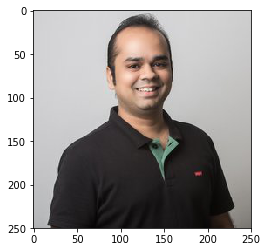

In [6]:
cv_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(cv_rgb)
plt.show()

### Detect a face

OpenCV is very powerful and can make it very easy to perform complicated but common tasks in Computer Vision, like human face detection, for example. Let's see that in action.

In [7]:
# load the face detector and detect faces in the image
detector = cv2.CascadeClassifier("/Users/soumendra/anaconda3/pkgs/opencv3-3.1.0-py35_0/share/OpenCV/haarcascades/haarcascade_frontalface_default.xml")
rects = detector.detectMultiScale(gray, scaleFactor=1.05, 
                                  minNeighbors=7, minSize=(30, 30),
                                  flags=cv2.CASCADE_SCALE_IMAGE)

Note:
* Path to Haar Cascades may not be correctly detected if Python was installed through Anaconda
* You can imitate the path provided above to locat the correct xml file in your installation
* https://github.com/Hironsan/BossSensor/issues/9

We'll now loop over the detected rectangles (if any) which identify the faces in the image.

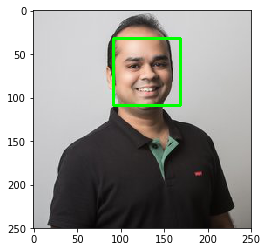

In [8]:
# loop over the faces and draw a rectangle surrounding each
for (x, y, w, h) in rects:
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.show()

### Review

Let's put it all together for another image and see how the algorithm performs for an image of small size. (The last image was of size 250x250, but it had only one large face to be detected. Let's try an image of similar size but with many faces.)

OpenCV Version : 3.1.0 

Before:



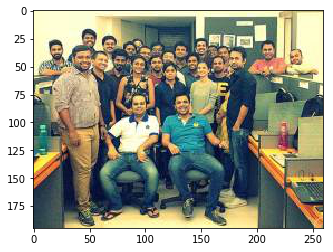

After:



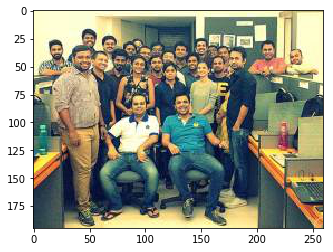

In [9]:
%matplotlib inline
import cv2
import matplotlib.pyplot as plt
import numpy as np
import sys
from pprint import pprint
print("OpenCV Version : %s " % cv2.__version__)

# load our image and convert it to grayscale
image = cv2.imread("./images/face02.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Before
print("\nBefore:\n")
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.show()

# load the face detector and detect faces in the image
detector = cv2.CascadeClassifier("/Users/soumendra/anaconda3/pkgs/opencv3-3.1.0-py35_0/share/OpenCV/haarcascades/haarcascade_frontalface_default.xml")
rects = detector.detectMultiScale(gray, scaleFactor=1.05, 
                                  minNeighbors=7, minSize=(30, 30),
                                  flags=cv2.CASCADE_SCALE_IMAGE)

# loop over the faces and draw a rectangle surrounding each
for (x, y, w, h) in rects:
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

# After
print("After:\n")
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.show()

It looks like the algorithm didn't perform very well on a small image (260x195). The next image is larger (710x800) and has varying light conditions.

OpenCV Version : 3.1.0 

Before:



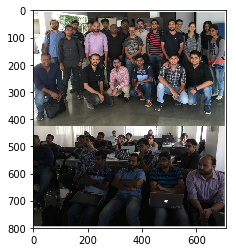

After:



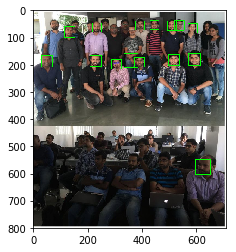

In [10]:
%matplotlib inline
import cv2
import matplotlib.pyplot as plt
import numpy as np
import sys
from pprint import pprint
print("OpenCV Version : %s " % cv2.__version__)

# load our image and convert it to grayscale
image = cv2.imread("./images/face03.jpeg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Before
print("\nBefore:\n")
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.show()

# load the face detector and detect faces in the image
detector = cv2.CascadeClassifier("/Users/soumendra/anaconda3/pkgs/opencv3-3.1.0-py35_0/share/OpenCV/haarcascades/haarcascade_frontalface_default.xml")
rects = detector.detectMultiScale(gray, scaleFactor=1.05, 
                                  minNeighbors=7, minSize=(30, 30),
                                  flags=cv2.CASCADE_SCALE_IMAGE)

# loop over the faces and draw a rectangle surrounding each
for (x, y, w, h) in rects:
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

# After
print("After:\n")
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.show()